In [217]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [218]:
#arrests in the united states
data=sm.datasets.get_rdataset("USArrests", "datasets").data

In [219]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [220]:
data.mean(axis=0) #obtainig the mean grouped by columns

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [221]:
data.var(axis=0) #We must estandarizw the variables in order to have a average 0 and standard desviation =2
#the variable assault is going to dominate the rest of principal components

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [222]:
#if the variables has different dispersions it necessary to transofrm the data under the standard scaler
from sklearn.preprocessing import StandardScaler

In [223]:
pca_pipe = make_pipeline(StandardScaler(), PCA())

In [224]:
#training model with adjusted data
pca_pipe.fit(data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [225]:
#extrayendo el modelo
modelo_pca=pca_pipe.named_steps['pca']

In [226]:
mapa=pd.DataFrame(
    data=modelo_pca.components_,
    columns=data.columns,
    index=['PC1','PC2','PC3','PC4']).loc['PC1']
#each component is a the result of the linear combination of the variables
#the first component is determined by the Assault

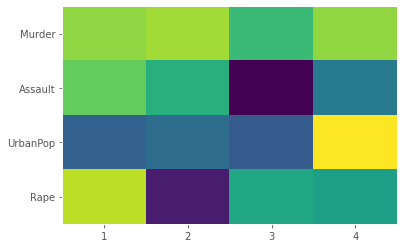

In [227]:
plt.imshow(modelo_pca.components_, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)#configuration of grid lines (lineas de cuadricula) with false remove the gridlines

In [228]:
plt.colorbar

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

In [229]:
#np.arange show me a list until the number of componentes
#+1 is adding an unity for each elment of the list
np.arange(modelo_pca.n_components_)

array([0, 1, 2, 3])

In [230]:
modelo_pca.components_.T #transpuesta

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [231]:
#varianza explicada por cada una de ellas
pd.DataFrame(
    data=modelo_pca.components_,
    columns=data.columns,
    index=['PC1','PC2','PC3','PC4'])

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [232]:
list(zip(np.arange(len(data.columns)) + 1, modelo_pca.explained_variance_ratio_))
#a list with two tuples

[(1, 0.6200603947873733),
 (2, 0.24744128813496036),
 (3, 0.08914079514520748),
 (4, 0.04335752193245878)]

In [233]:
lista=[]

In [234]:
for i in list(np.arange(modelo_pca.n_components_) + 1):
    lista.append('PC'+str(i))

In [235]:
varianza_explicada=pd.DataFrame(index=lista,
    data=modelo_pca.explained_variance_ratio_).rename(columns={0:'Varianza explicada'})

In [236]:
varianza_explicada

,Varianza explicada
PC1,0.620060
PC2,0.247441
PC3,0.089141
PC4,0.043358


In [237]:
varianza_explicada_acum=pd.DataFrame(index=lista,
    data=modelo_pca.explained_variance_ratio_.cumsum()).rename(columns={0:'Varianza explicada acum'})

In [238]:
varianza_explicada_acum

,Varianza explicada acum
PC1,0.620060
PC2,0.867502
PC3,0.956642
PC4,1.000000


In [239]:
#in the next part, we must tranform the variables
data_proyections0 = pca_pipe.transform(data)

In [240]:
data_proyections1 = pd.DataFrame(data=
    data_proyections0,columns=lista,index=data.index)

In [242]:
data_proyections1 #La transformación es el resultado de multiplicar los vectores que definen cada componente con
#el valor de las variables. Puede calcularse de forma manual:

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


In [244]:
from sklearn.linear_model import LinearRegression

In [246]:
X = data.drop(columns='fat')
y = data['fat']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

KeyError: "['fat'] not found in axis"

In [245]:
#next, you can apply a machine learning a model, in this case, we are going to apply the linear regression
#a pipeline is something that allows you to synthethize many process in one (standrad scaler + pca +MLModel)
pip = make_pipeline(StandardScaler(), PCA(), LinearRegression())

In [ ]:
#fitting the model on the training data